<a href="https://colab.research.google.com/github/kvinne-anc/Data-Science-Notebooks/blob/main/Bayesian_Inference_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [ ]:
#Make a function that can update the prior everytime and rerun the equation 


In [ ]:
import matplotlib.pyplot as plt


P_drunk = 1/1000 # prior belief
P_non_drunk = 1 - P_drunk  # complement of the prior belief
P_pos_given_drunk = 1 # this is the true positive rate
P_pos_given_non_drunk = .08 # this is the false positive rate

def prob_drinkdrive(prob_drunk_prior, false_positive_rate, true_positive_rate, number_of_tests):
    posterior_probability=prob_drunk_prior
    prior_post = list()
    for test in range(0, number_of_tests):
        P_drunk = posterior_probability # prior belief 1/1000
        P_non_drunk = 1 - P_drunk  # complement of the prior belief
        P_pos_given_drunk = true_positive_rate # this is the true positive rate
        P_pos_given_non_drunk = false_positive_rate # this is the false positive rate
        posterior_probability = (P_pos_given_drunk*P_drunk)/((P_pos_given_drunk*P_drunk) + (P_pos_given_non_drunk*P_non_drunk))
        prior_post.append(posterior_probability)
    return prior_post

In [ ]:
posterior = prob_drunk_given_positive(1/1000, .08, 1)
print('{:.4f}'.format(posterior))

0.0124


In [ ]:
prob_drinkdrive(0.001, 0.08, 1, 5)
#Posterior(prior, false positive, true positive, times run)

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734]

In [ ]:
#Probability of being drunk after 1 pos. test
#The probability after 1 test is 1.24%
#Probability after 2 pos. tests 
#Probability increases to 13.5% after two tests 
#How many times would you need to test pos for 95% sureity 
#After 4 tests we have a 96% chance that you have accurately been identified as drunk when testing positive, so four times. 


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns


In [ ]:
housing = pd.read_csv('/content/sample_data/california_housing_train.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
ttest_ind(housing['median_income'], housing['median_house_value'])

Ttest_indResult(statistic=-233.0345623005931, pvalue=0.0)

In [ ]:
#Create a visualization 
#comparing the results of a Bayesian approach to a traditional/freq. 

In [ ]:
housing['median_income'].describe()

count    17000.000000
mean         3.883578
std          1.908157
min          0.499900
25%          2.566375
50%          3.544600
75%          4.767000
max         15.000100
Name: median_income, dtype: float64

In [ ]:
housing['median_house_value'].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
imean = housing['median_income'].mean()
print(imean)

3.883578100000021


In [ ]:
pmean = housing['median_house_value'].mean()
print(pmean)

207300.91235294117


In [ ]:
high_i = housing[housing['median_income'] >4.767]
high_i.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,high_price,high_income
32,-115.39,32.76,16.0,1136.0,196.0,481.0,185.0,6.2558,146300.0,0,1
69,-115.55,32.98,33.0,2266.0,365.0,952.0,360.0,5.4349,143000.0,0,1
92,-115.57,32.78,20.0,1534.0,235.0,871.0,222.0,6.2715,97200.0,0,1
98,-115.58,32.78,5.0,2494.0,414.0,1416.0,421.0,5.7843,110100.0,0,1
99,-115.59,32.85,20.0,1608.0,274.0,862.0,248.0,4.8750,90800.0,0,1


In [ ]:
high_p = housing[housing['median_house_value'] >265000]
high_p.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,high_price,high_income
172,-116.26,33.65,3.0,7437.0,1222.0,574.0,302.0,10.2948,382400.0,1,1
187,-116.33,33.72,11.0,12327.0,2000.0,2450.0,1139.0,7.4382,353100.0,1,1
193,-116.37,33.69,7.0,8806.0,1542.0,858.0,448.0,7.8005,318100.0,1,1
209,-116.42,33.79,12.0,7095.0,1260.0,1179.0,570.0,4.9444,285000.0,1,1
210,-116.42,33.76,14.0,16921.0,2837.0,2524.0,1262.0,7.6281,341700.0,1,1


In [ ]:
from scipy.stats import ttest_ind, ttest_1samp

In [ ]:
high_i['median_house_value'].mean()

318413.2825882353

In [ ]:
import scipy
from scipy import stats
confidence = 0.95 

In [ ]:
inc_mean = np.mean(high_i)
print(inc_mean)

longitude               -119.596544
latitude                  35.376652
housing_median_age        25.881647
total_rooms             3265.721647
total_bedrooms           524.364941
population              1438.688941
households               500.619294
median_income              6.431169
median_house_value    318413.282588
high_price                 0.878824
high_income                0.981176
dtype: float64


In [ ]:
high_av = high_i[high_i['median_house_value'] >265000]
high_av['housing_median_age'].mean()

28.013756209400075

In [ ]:
conf_int=stats.t.interval(0.95, 
                 high_av.shape[0], 
                 loc = high_av['housing_median_age'].mean(), 
                 scale = stats.sem(high_av['housing_median_age'])
                 )
conf_int

(27.51246555820547, 28.51504686059468)

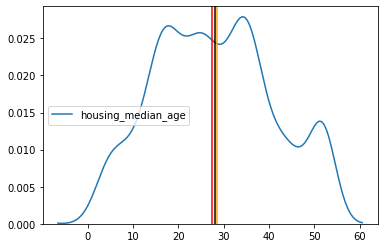

In [ ]:
sns.kdeplot(high_av['housing_median_age']);

plt.axvline(x=conf_int[0], color='red');
plt.axvline(x=conf_int[1], color='orange');
plt.axvline(x=high_av['housing_median_age'].mean(), color='black');

In [ ]:
#median age of high income earners 

In [ ]:
#Here is our traditional/freq visualization 
#Now we will do a Bayesian comparison 


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
housing['high_income']=np.where(housing['median_income']>=4.767, 1, 0)
housing['high_income'].value_counts()

0    12750
1     4250
Name: high_income, dtype: int64

In [ ]:
x = housing.drop(['median_income', 'high_income'], axis=1)
y = housing['high_income']

In [ ]:
#train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
len(y_test)

5100

In [ ]:
mymodel = RandomForestClassifier()

In [ ]:
mymodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds = mymodel.predict(X_test)

In [ ]:
print(list(y_preds[:10]))
print(list(y_test[:10]))

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
metrics.accuracy_score(y_test, y_preds)

0.8917647058823529

In [ ]:
metrics.confusion_matrix(y_test, y_preds)

array([[3572,  205],
       [ 347,  976]])

In [ ]:
y_preds [:5]

array([0, 1, 0, 0, 0])

In [ ]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_preds), columns=['pred_0', 'pred_1'])
cm

,pred_0,pred_1
0,3572,205
1,347,976


In [ ]:
print((3575+970)/5100)

0.8911764705882353


In [ ]:
#970 true positives 
#3575 true negatives
#202 false positives 
#353 false negatives  

In [ ]:
TN = cm['pred_0'].values[0]
FN = cm['pred_0'].values[1]
FP = cm['pred_1'].values[0]
TP = cm['pred_1'].values[1]
TOTAL = cm.values.sum()

In [ ]:
print('True Negatives:', TN)
print('False Negatives:', FN)
print('False Positives:', FP)
print('True Positives:', TP)
print('All:', TOTAL)

True Negatives: 3575
False Negatives: 353
False Positives: 202
True Positives: 970
All: 5100


In [ ]:
print(f'Accuracy: {(TP + TN)/TOTAL}')

Accuracy: 0.8911764705882353


In [ ]:
print(f'Queue Rate: {TP + FP}')

Queue Rate: 1172


In [ ]:
print(f'True Positive Rate: {TP/(TP + FN)}')

True Positive Rate: 0.7331821617535903


In [ ]:
print(f'False Positive Rate: {FP/ (TN + FP)}')

False Positive Rate: 0.05348159915276675


In [ ]:
print(f'Precision: {TP/(TP + FP)}')

Precision: 0.8276450511945392


In [ ]:
print(f'Specificity: {TN / (TN + FP)}')

Specificity: 0.9465184008472333


In [ ]:
print(f'Prevalence: {(TP + FN)/TOTAL}')

Prevalence: 0.25941176470588234


In [ ]:
p_a = .259    #prior
p_b = 1172
p_b_given_a = .733  #true pos

In [ ]:
p_a = .259  # prior belief
p_na = 1 - p_a  # complement of the prior belief
p_b_given_a = .733 # this is the true positive rate
p_b_na = 0.0535 # this is the false positive rate

In [ ]:
def bayes_w_marginal(p_a, p_b, p_b_given_a):
  p_a_given_b = (p_b_given_a*p_a)/p_b
  return p_a_given_b

In [ ]:
bayes_w_marginal(p_a, p_b, p_b_given_a)

0.0001619854948805461

In [ ]:
def prob(p_a, p_b_na, p_b_given_a, p_b):
  post=p_a
  prior_post = list()
  for test in range(0, p_b):
    p_a = post 
    p_na = 1 - p_a
    p_b_given_a = 0.733
    p_b_na = 0.0535
    post = (p_b_given_a*p_a)/((p_b_given_a*p_a) + (p_b_na*p_na))
    prior_post.append(post)
  return prior_post

In [ ]:
prob(0.259, .0535, 0.733, 1172)

[0.8272542872145034,
 0.9849876444553695,
 0.9988888184604267,
 0.9999188137628083,
 0.9999940739555169,
 0.9999995674691383,
 0.9999999684305452,
 0.9999999976958173,
 0.999999999831823,
 0.9999999999877252,
 0.999999999999104,
 0.9999999999999346,
 0.9999999999999951,
 0.9999999999999997,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,


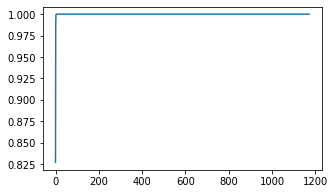

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.plot(prob(0.259, .0535, 0.733, 1172))
plt.show()

In [ ]:
#Difference between Freq. and Baye stats - Baye includes background knowledge and allows us to take into account the prior probabilities of something occuring
##Bayesian is subjective 

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!